<a href="https://colab.research.google.com/github/charles-hartley/Gaddemit/blob/main/covid_tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#create a death rate column
filtered_df["death_rate"] = (filtered_df["total_deaths"] / filtered_df["total_cases"]) * 100

<ipython-input-14-0a5d04fbde07>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["death_rate"] = (filtered_df["total_deaths"] / filtered_df["total_cases"]) * 100


In [ ]:
#create a death rate column
filtered_df["death_rate"] = (filtered_df["total_deaths"] / filtered_df["total_cases"]) * 100

<ipython-input-14-0a5d04fbde07>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["death_rate"] = (filtered_df["total_deaths"] / filtered_df["total_cases"]) * 100


In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime


In [ ]:
#set plot styles
plt.style.use("seaborn-v0_8")
sns.set(font_scale=1.2)
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["axes.grid"] = True

In [ ]:
#loading data from Our World in Data(Covid-19 dataset)
try:
  url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
  df = pd.read_csv(url)
  print("Data loaded sucessfully from URL")
except:
  print("Could not load data from URL. Attempting to loead from local file...")
  try:
    df = pd.read_csv("owid-covid-data.csv")
    print("Data loaded successfully from local file")
  except:
    print("Error: Could not load data. Please ensure the CSV file is available.")

Data loaded sucessfully from URL


In [ ]:
#data exploration
#display basic information
print(f"Dataset shape: {df.shape}")
print(f"\nTime period covered: {df['date'].min()} to {df['date'].max()}")
print(f"\nNumber of locations: {df['location'].nunique()}")

Dataset shape: (429435, 67)

Time period covered: 2020-01-01 to 2024-08-14

Number of locations: 255


In [ ]:
#display columns
print("\nColumns in the dataset:")
print(df.columns.tolist())


Columns in the dataset:
['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccina

In [ ]:
#preview the first few rows
print("\nPreview of the data")
display(df.head())


Preview of the data


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [ ]:
#check for missing values
print("\nMissing values in key columns")
missing_values = df[["location", "date", "total_cases", "total_deaths", "new_cases", "new_deaths", "total_vaccinations"]].isnull().sum()
print(missing_values)


Missing values in key columns
location                   0
date                       0
total_cases            17631
total_deaths           17631
new_cases              19276
new_deaths             18827
total_vaccinations    344018
dtype: int64


In [ ]:
#data cleaning
#convert date to datetime format
df["date"] = pd.to_datetime(df["date"])

In [ ]:
#select countries of interest for detailed analysis
countries_of_interest = ["World", "United States", "South Africa", "Kenya", "United Kingdom", "China"]
filtered_df = df[df["location"].isin(countries_of_interest)]
#excluding aggregated regions like "world"
countries_only_df = filtered_df[~filtered_df["location"].isin(["World", "International"])]

In [ ]:
#handle missing values in key columns
cols_to_ffill = ["total_cases", "total_deaths", "total_vaccinations", "people_fully_vaccinated"]
filtered_df[cols_to_ffill] = filtered_df.groupby("location")[cols_to_ffill].transform(lambda x: x.ffill())

<ipython-input-12-7d1aa11d1902>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[cols_to_ffill] = filtered_df.groupby("location")[cols_to_ffill].transform(lambda x: x.ffill())


In [ ]:
#for daily new values, replace NaN with 0 or interpolate
cols_to_zero_fill = ["new_cases", "new_deaths", "new_vaccinations"]
filtered_df[cols_to_zero_fill] = filtered_df[cols_to_zero_fill].fillna(0)

<ipython-input-13-166ff9c15e14>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[cols_to_zero_fill] = filtered_df[cols_to_zero_fill].fillna(0)


In [ ]:
#create a death rate column
filtered_df["death_rate"] = (filtered_df["total_deaths"] / filtered_df["total_cases"]) * 100

<ipython-input-14-0a5d04fbde07>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["death_rate"] = (filtered_df["total_deaths"] / filtered_df["total_cases"]) * 100


In [ ]:
#create a vaccination rate column(percentage of population)
filtered_df["vaccination_rate"] = (filtered_df["people_fully_vaccinated"] / filtered_df["population"] * 100).round(2)

<ipython-input-15-ccbad5f8ce11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["vaccination_rate"] = (filtered_df["people_fully_vaccinated"] / filtered_df["population"] * 100).round(2)


In [ ]:
#create a vaccination rate column(percentage of population)
filtered_df["vaccination_rate"] = (filtered_df["people_fully_vaccinated"] / filtered_df["population"] * 100).round(2)

<ipython-input-16-ccbad5f8ce11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["vaccination_rate"] = (filtered_df["people_fully_vaccinated"] / filtered_df["population"] * 100).round(2)


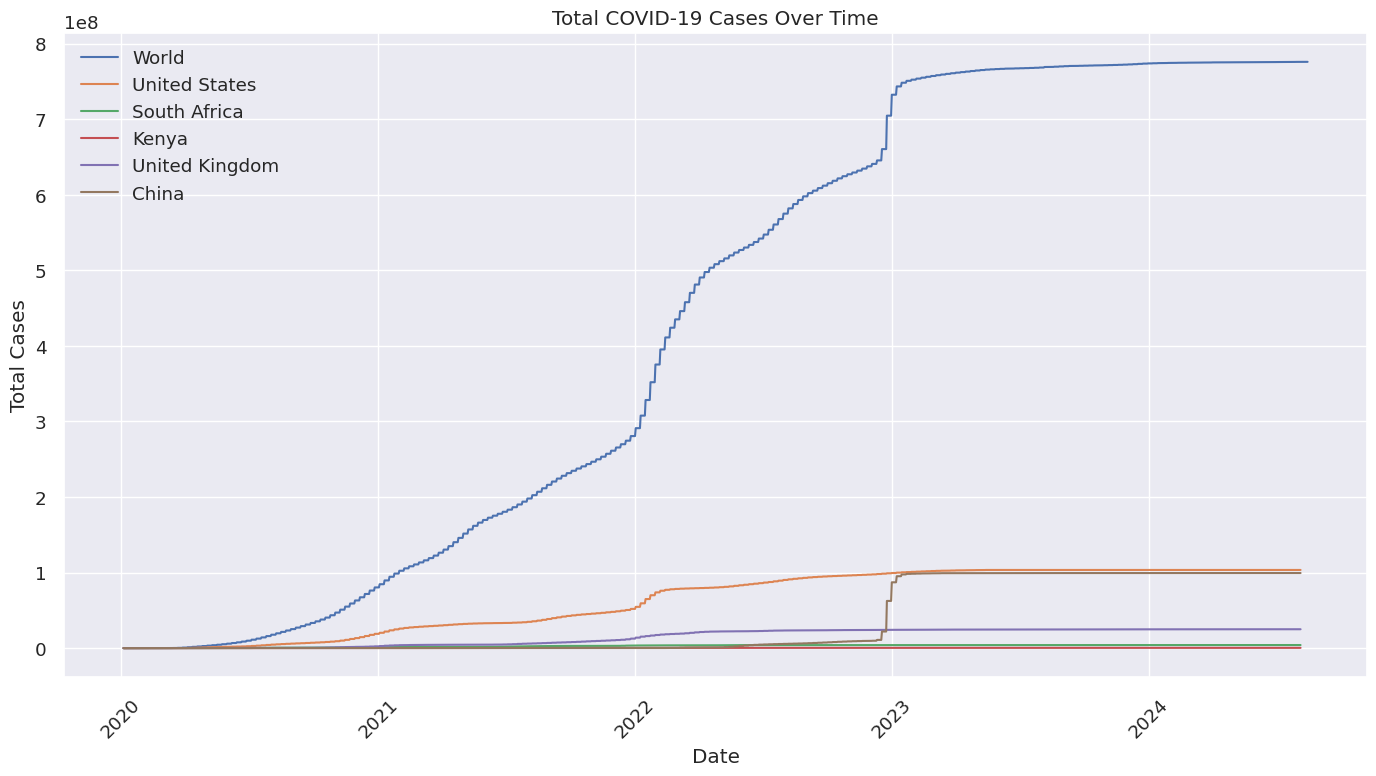

In [ ]:
#exploratory data analysis, total cases over time
plt.figure(figsize=(14, 8))
for country in countries_of_interest:
  country_data = filtered_df[filtered_df["location"] == country]
  if not country_data.empty:
    plt.plot(country_data["date"], country_data["total_cases"], label=country)
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

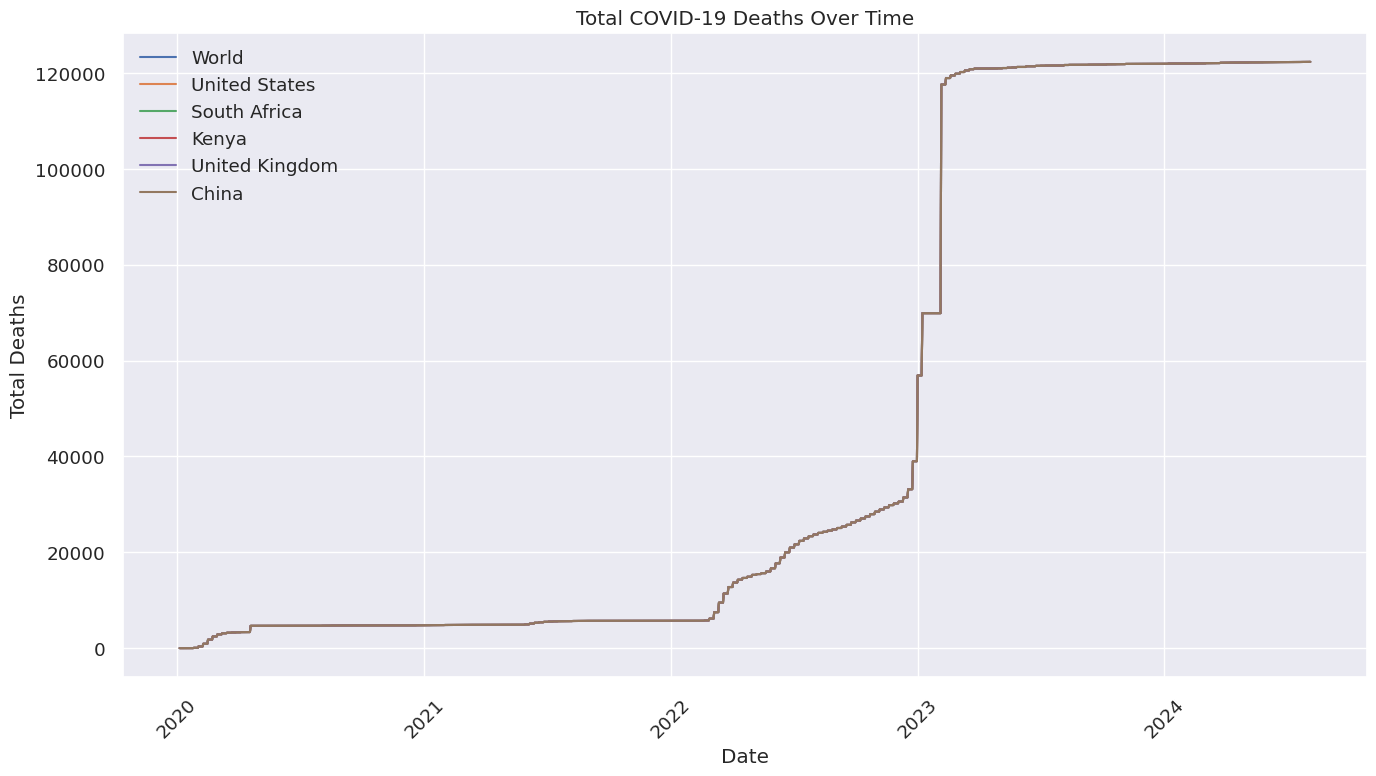

In [ ]:
#total deaths over time
plt.figure(figsize=(14, 8))
for country in countries_of_interest:
  counrty_data = filtered_df[filtered_df["location"] == country]
  if not country_data.empty:
    plt.plot(country_data["date"], country_data["total_deaths"], label=country)
plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-19-a1799c8a87e8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[country_mask, "new_cases_7day_avg"] = filtered_df.loc[country_mask, "new_cases"].rolling(7).mean()


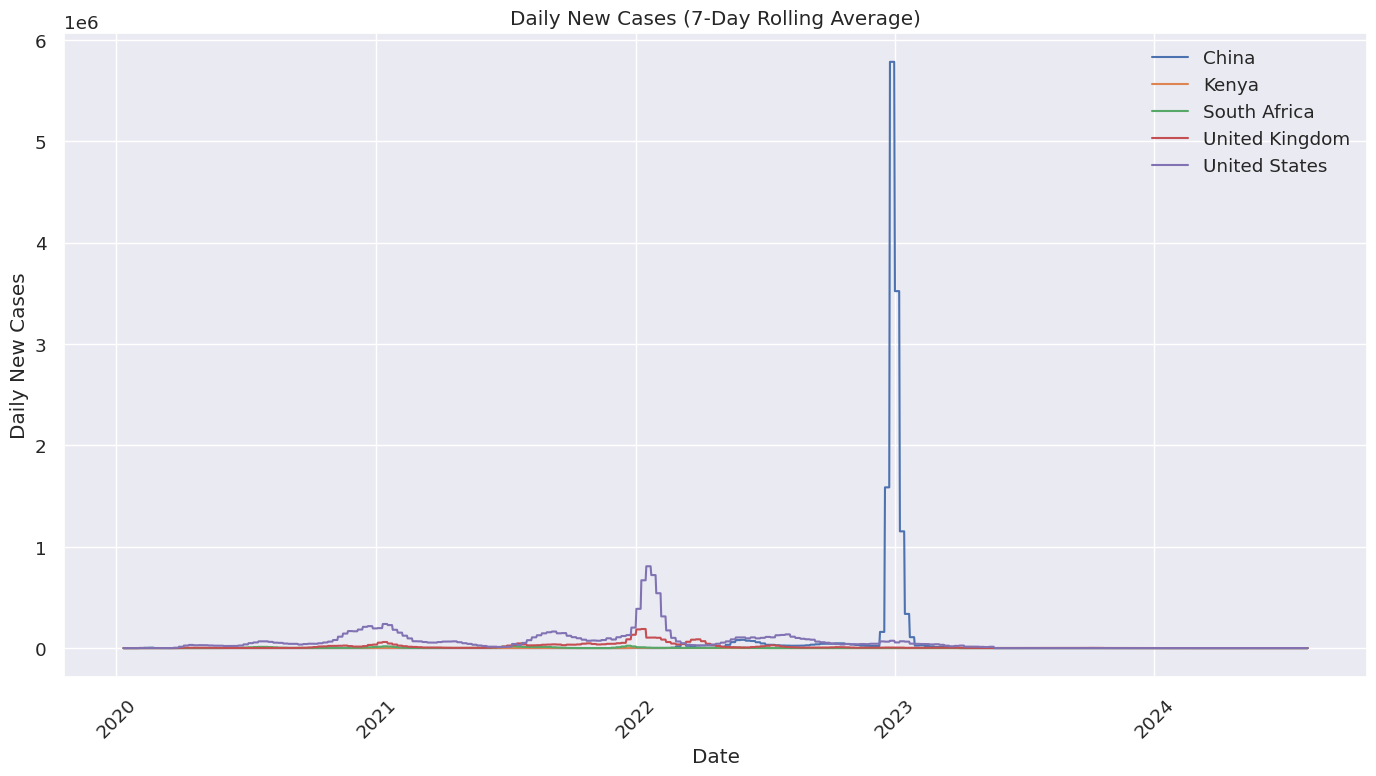

In [ ]:
#daily new cases, calculate 7 day rolling average
for country in countries_of_interest:
  country_mask = filtered_df["location"] == country
  filtered_df.loc[country_mask, "new_cases_7day_avg"] = filtered_df.loc[country_mask, "new_cases"].rolling(7).mean()

plt.figure(figsize=(14, 8))
for country in countries_only_df["location"].unique():
  country_data = filtered_df[filtered_df["location"] == country]
  plt.plot(country_data["date"], country_data["new_cases_7day_avg"], label=country)
plt.title("Daily New Cases (7-Day Rolling Average)")
plt.xlabel("Date")
plt.ylabel("Daily New Cases")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

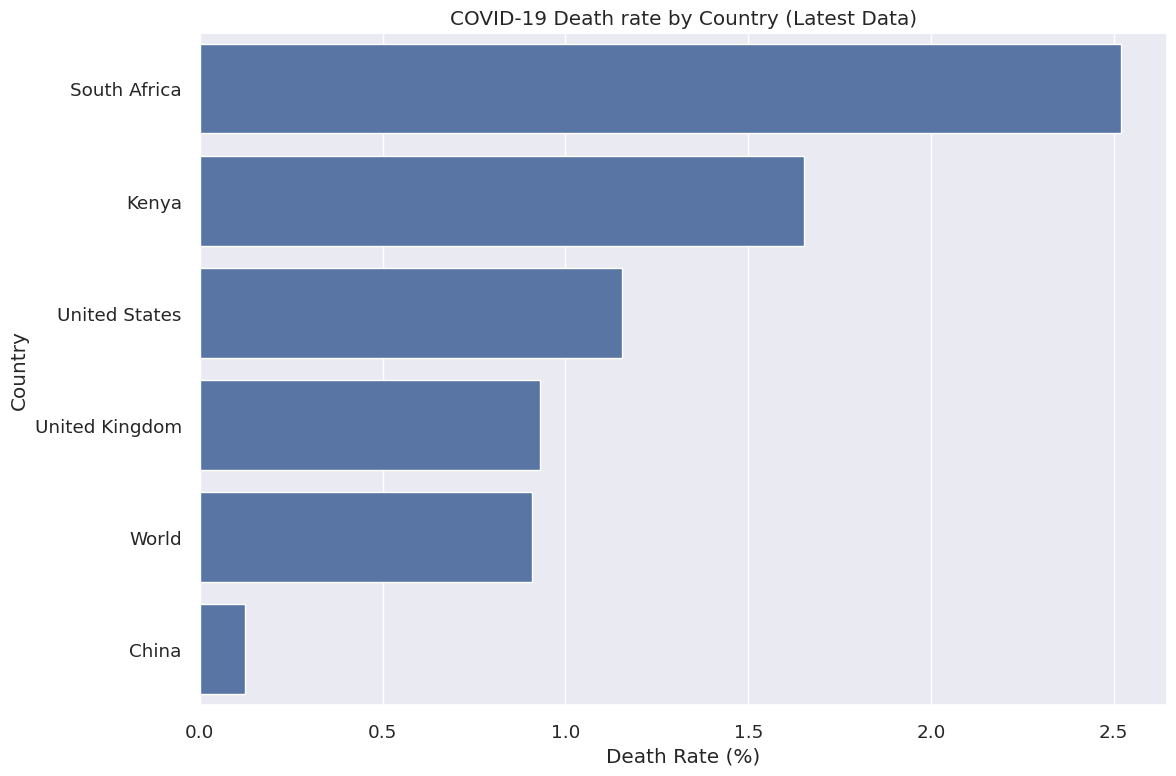

In [ ]:
#Death rate comparison, get the latest available data for each country
latest_data = filtered_df.sort_values("date").groupby("location").last().reset_index()
latest_data = latest_data.sort_values("death_rate", ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x="death_rate", y="location", data=latest_data)
plt.title("COVID-19 Death rate by Country (Latest Data)")
plt.xlabel("Death Rate (%)")
plt.ylabel("Country")
plt.grid(True, axis="x")
plt.tight_layout()
plt.show()

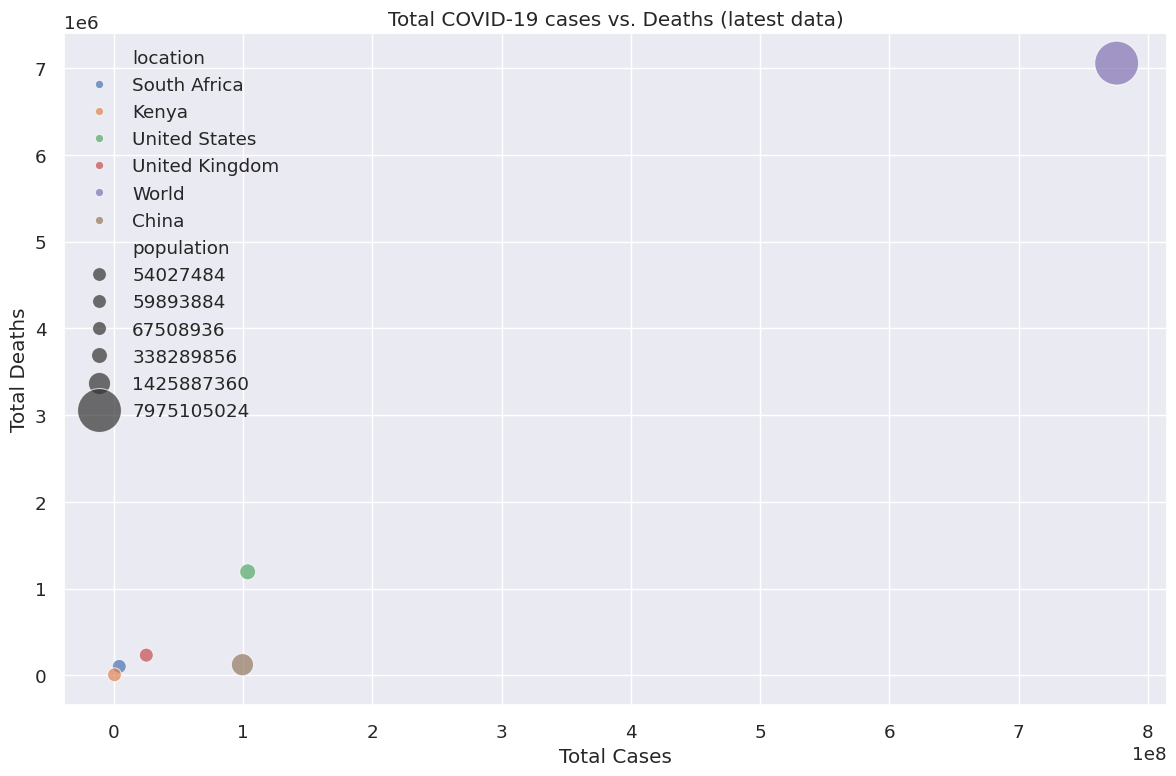

In [ ]:
#total cases vs total deaths(scatterplot)
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=latest_data,
    x="total_cases",
    y="total_deaths",
    size="population",
    hue="location",
    sizes=(100, 1000),
    alpha=0.7
)
plt.title("Total COVID-19 cases vs. Deaths (latest data)")
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.grid(True)
plt.tight_layout()
plt.show()

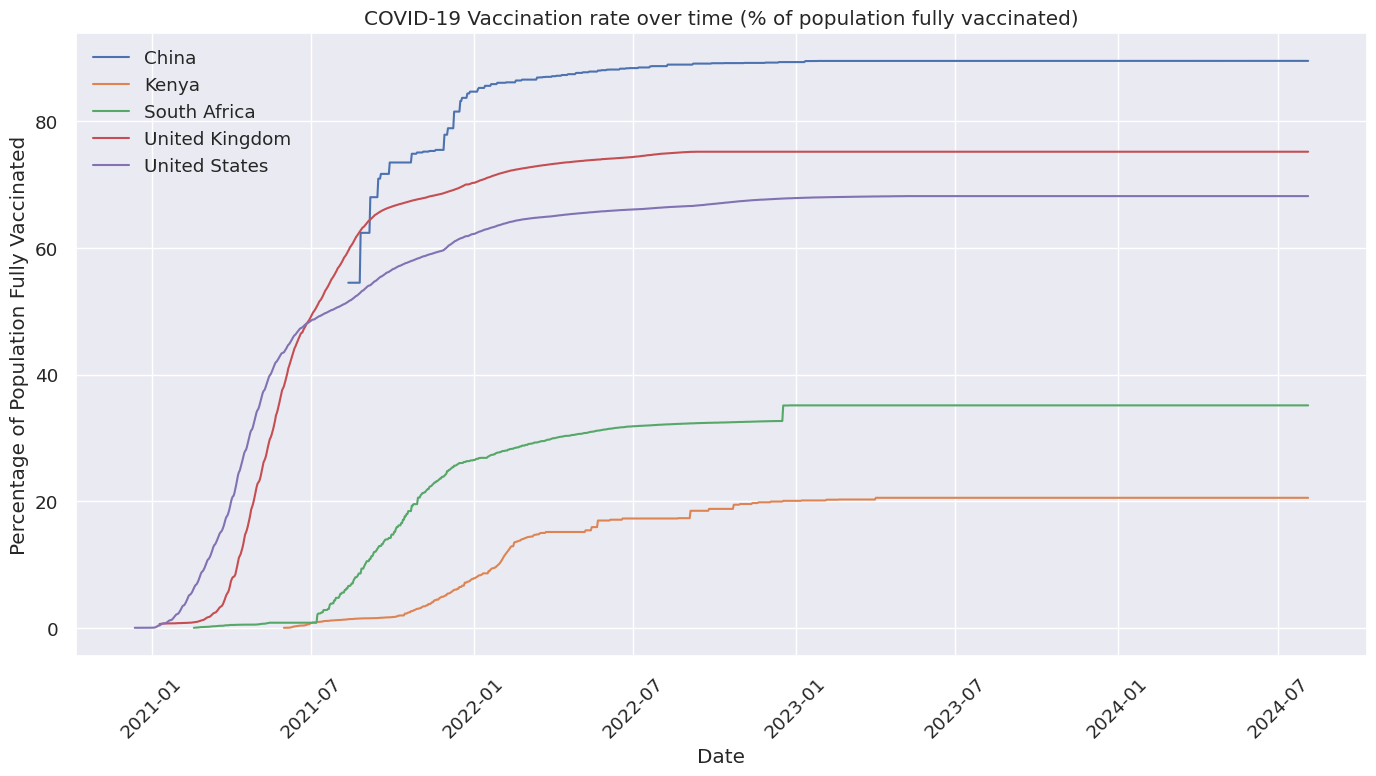

In [ ]:
#Vaccination analysis, vaccination progress over time
plt.figure(figsize=(14, 8))
for country in countries_only_df["location"].unique():
  country_data = filtered_df[filtered_df["location"] == country]
  plt.plot(country_data["date"], country_data["vaccination_rate"], label=country)
plt.title("COVID-19 Vaccination rate over time (% of population fully vaccinated)")
plt.xlabel("Date")
plt.ylabel("Percentage of Population Fully Vaccinated")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

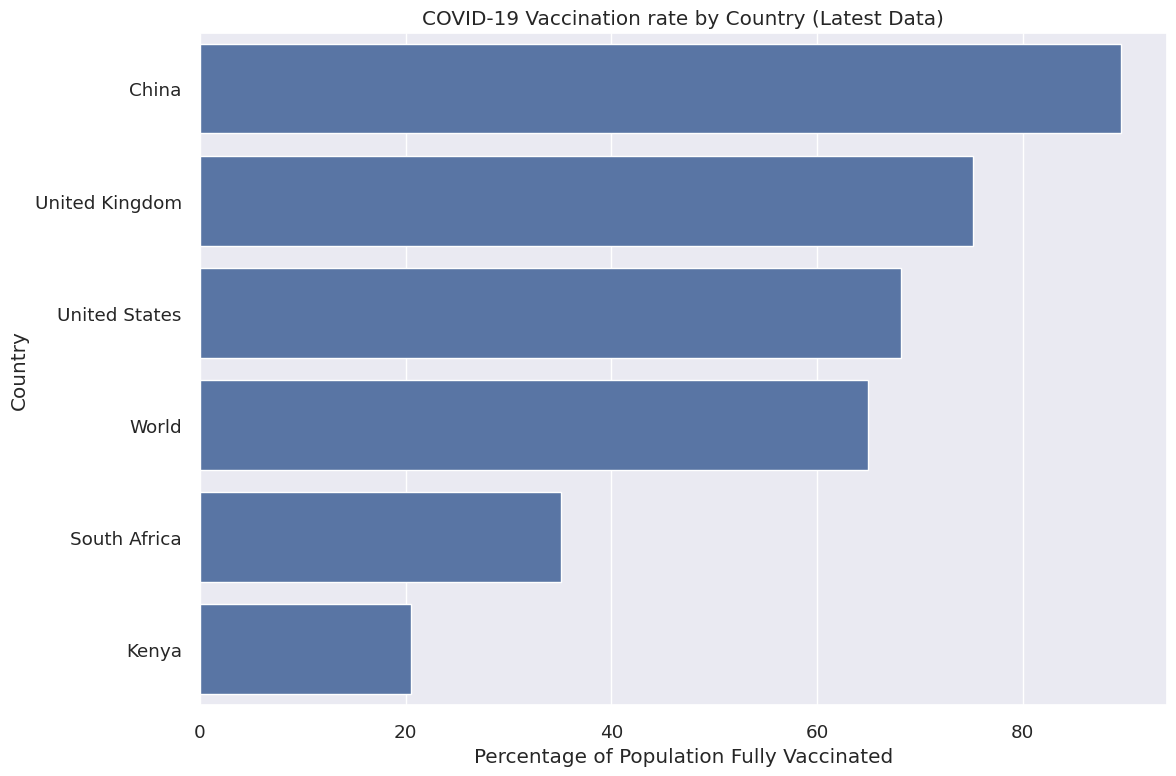

In [ ]:
#latest vaccination rates (bar chart)
latest_data = latest_data.sort_values("vaccination_rate", ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x="vaccination_rate", y="location", data=latest_data)
plt.title("COVID-19 Vaccination rate by Country (Latest Data)")
plt.xlabel("Percentage of Population Fully Vaccinated")
plt.ylabel("Country")
plt.grid(True, axis="x")
plt.tight_layout()
plt.show()

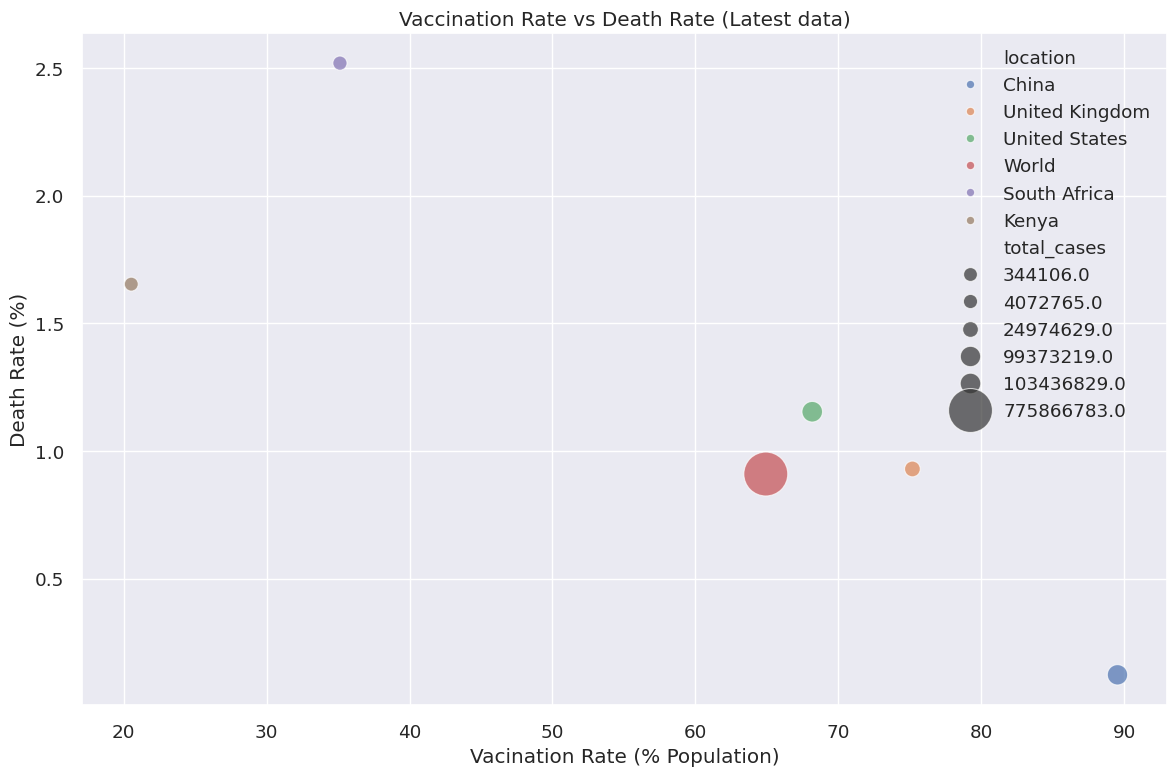

In [ ]:
#Vaccination vs Death Rate(Bubble chart)
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=latest_data,
    x="vaccination_rate",
    y="death_rate",
    size="total_cases",
    hue="location",
    sizes=(100, 1000),
    alpha=0.7
)
plt.title("Vaccination Rate vs Death Rate (Latest data)")
plt.xlabel("Vacination Rate (% Population)")
plt.ylabel("Death Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#choropleth map visualization, prepare data for the latest date available
latest_date =df["date"].max()
latest_global_data = df[df["date"] == latest_date].copy()

In [ ]:
#creating choropleth map for total cases
try:
  fig = px.choropleth(
      latest_global_data,
      locations="iso_code",
      color="total_cases",
      hover_name="location",
      projection="natural earth",
      color_continuous_scale="Viridis",
      title=f"Global Covid-19 total cases (as of {latest_date.strftime('%Y-%m-%d')})"
  )
  fig.update_layout(coloraxis_colorbar=dict(title="Total Cases"))
  fig.show()
except Exception as e:
  print(f"Could not create choropleth map: {e}")
  print("To view interactive maps, ensure you've an environment with plotly")

In [ ]:
#create choropleth map for vaccination rates
try:
  fig = px.choropleth(
      latest_global_data,
      locations="iso_code",
      color="people_vaccinated_per_hundred",
      hover_name="location",
      projection="natural earth",
      color_continuous_scale="Viridis",
      title=f"Global Covid-19 vaccination rates (as of {latest_date.strftime('%Y-%m-%d')})"
  )
  fig.update_layout(coloraxis_colorbar=dict(title="Vaccination Rate"))
  fig.show()
except Exception as e:
  print(f"Could not create vaccination choropleth map: {e}")

In [ ]:
#Key insights and findings, calculate summary statistics for insights
world_data = filtered_df[filtered_df["location"] == "World"].sort_values("date")
current_global_cases = world_data.iloc[-1]["total_cases"]
current_global_deaths = world_data.iloc[-1]["total_deaths"]
current_global_vaccinations = world_data.iloc[-1]["people_fully_vaccinated"]
global_death_rate = (current_global_deaths / current_global_cases) * 100
global_vaccination_rate = (current_global_vaccinations / world_data["population"].sum()) * 100

In [ ]:
# Find country with highest vaccination rate
highest_vax_country = latest_data.loc[latest_data['vaccination_rate'].idxmax()]
lowest_death_rate_country = latest_data.loc[latest_data['death_rate'].idxmin()]

print(f"""
Key Insights from COVID-19 Data Analysis

Global Impact
- As of {latest_date.strftime('%Y-%m-%d')}, there have been approximately {current_global_cases:,.0f} confirmed COVID-19 cases worldwide.
- Global deaths have reached {current_global_deaths:,.0f}, resulting in a global death rate of {global_death_rate}%.

Vaccination Progress
- {highest_vax_country['location']} has achieved the highest vaccination rate among analyzed countries at {highest_vax_country['vaccination_rate']}% of the population.
- Countries with higher vaccination rates generally show a stabilization in new case growth.

Country Comparisons
- {lowest_death_rate_country['location']} has maintained the lowest death rate at {lowest_death_rate_country['death_rate']}%.
- The data shows significant variations in testing rates, which may impact the reported case numbers.

Trends and Patterns
- Several waves of infections are visible in the data, often coinciding with the emergence of new variants.
- Vaccination campaigns show varied paces of implementation across different countries.
- Death rates have generally decreased over time as treatments improved and vulnerable populations gained protection.

Limitations of Analysis
- Data reporting varies significantly between countries.
- Testing strategies and capacities differ, affecting case detection rates.
- Definitions of COVID-19 deaths are not standardized globally.
""")


Key Insights from COVID-19 Data Analysis

Global Impact
- As of 2024-08-14, there have been approximately 775,866,783 confirmed COVID-19 cases worldwide.
- Global deaths have reached 7,057,132, resulting in a global death rate of 0.9095803757331368%.

Vaccination Progress
- China has achieved the highest vaccination rate among analyzed countries at 89.54% of the population.
- Countries with higher vaccination rates generally show a stabilization in new case growth.

Country Comparisons
- China has maintained the lowest death rate at 0.12307541330627521%.
- The data shows significant variations in testing rates, which may impact the reported case numbers.

Trends and Patterns
- Several waves of infections are visible in the data, often coinciding with the emergence of new variants.
- Vaccination campaigns show varied paces of implementation across different countries.
- Death rates have generally decreased over time as treatments improved and vulnerable populations gained protection.

